# Analysis setweb Undemy

## import labreries

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## loading data

In [9]:
df = pd.read_csv(r"C:\Users\pcc\Desktop\PROJECT_CARRER\undemy\udemy_courses-raw.csv")

In [10]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [12]:
df.describe().round(2)

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3678.00,3678.00,3678.00,3678.00,3678.00,3678.00
mean,675971.96,66.05,3197.15,156.26,40.11,4.09
std,343273.16,61.01,9504.12,935.45,50.38,6.05
min,8324.00,0.00,0.00,0.00,0.00,0.00
25%,407692.50,20.00,111.00,4.00,15.00,1.00
50%,687917.00,45.00,911.50,18.00,25.00,2.00
75%,961355.50,95.00,2546.00,67.00,45.75,4.50
max,1282064.00,200.00,268923.00,27445.00,779.00,78.50


## Exploratort data analysis

### * univariable
### * bi variable
### * multi variable

In [16]:
df[['subject','level','is_paid']].value_counts()

subject              level               is_paid
Business Finance     All Levels          True       646
Web Development      All Levels          True       611
                     Beginner Level      True       323
Business Finance     Beginner Level      True       300
Graphic Design       All Levels          True       283
Musical Instruments  All Levels          True       267
                     Beginner Level      True       264
Graphic Design       Beginner Level      True       225
Business Finance     Intermediate Level  True       122
Web Development      Intermediate Level  True       118
Musical Instruments  Intermediate Level  True        96
Web Development      Beginner Level      False       68
Graphic Design       Intermediate Level  True        55
Business Finance     All Levels          False       50
Web Development      All Levels          False       48
Business Finance     Beginner Level      False       40
Musical Instruments  Beginner Level      False       32

In [17]:
df['published_timestamp'] = pd.to_datetime(df['published_timestamp'])

In [23]:
df.dtypes

course_id                            int64
course_title                        object
url                                 object
is_paid                               bool
price                                int64
num_subscribers                      int64
num_reviews                          int64
num_lectures                         int64
level                               object
content_duration                   float64
published_timestamp    datetime64[ns, UTC]
subject                             object
dtype: object

In [25]:
df['year'] = df['published_timestamp'].dt.year

In [26]:
df['month'] = df['published_timestamp'].dt.month_name()

In [27]:
df['days'] = df['published_timestamp'].dt.day_name()

In [29]:
df['profit'] = df['price']*df['num_subscribers']

In [31]:
df.sample(2)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year,month,days,profit
2693,944886,WordPress Look and Feel with Themes,https://www.udemy.com/learn-wordpress-customiz...,True,25,2371,10,12,Beginner Level,1.0,2016-09-04 19:34:22+00:00,Web Development,2016,September,Sunday,59275
2519,736940,Practical CSS Website Development: Crash Course,https://www.udemy.com/css-website-development-...,True,95,11170,35,19,All Levels,2.5,2016-02-02 21:05:27+00:00,Web Development,2016,February,Tuesday,1061150


In [32]:
df['course_id'].nunique()

3672

In [34]:
df[df.duplicated()]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year,month,days,profit
787,837322,Essentials of money value: Get a financial Life !,https://www.udemy.com/essentials-of-money-value/,True,20,0,0,20,All Levels,0.616667,2016-05-16 18:28:30+00:00,Business Finance,2016,May,Monday,0
788,1157298,Introduction to Forex Trading Business For Beg...,https://www.udemy.com/introduction-to-forex-tr...,True,20,0,0,27,Beginner Level,1.500000,2017-04-23 16:19:01+00:00,Business Finance,2017,April,Sunday,0
894,1035638,Understanding Financial Statements,https://www.udemy.com/understanding-financial-...,True,25,0,0,10,All Levels,1.000000,2016-12-15 14:56:17+00:00,Business Finance,2016,December,Thursday,0
1100,1084454,CFA Level 2- Quantitative Methods,https://www.udemy.com/cfa-level-2-quantitative...,True,40,0,0,35,All Levels,5.500000,2017-07-02 14:29:35+00:00,Business Finance,2017,July,Sunday,0
1473,185526,MicroStation - Células,https://www.udemy.com/microstation-celulas/,True,20,0,0,9,Beginner Level,0.616667,2014-04-15 21:48:55+00:00,Graphic Design,2014,April,Tuesday,0
2561,28295,Learn Web Designing & HTML5/CSS3 Essentials in...,https://www.udemy.com/build-beautiful-html5-we...,True,75,43285,525,24,All Levels,4.000000,2013-01-03 00:55:31+00:00,Web Development,2013,January,Thursday,3246375


In [35]:
df.drop_duplicates(inplace = True)

In [36]:
df.duplicated().sum()

0

In [37]:
df.sample(2)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year,month,days,profit
347,1209694,Become A Forex Trader - Forex trading like a p...,https://www.udemy.com/become-a-forex-trader/,False,0,1735,31,19,All Levels,2.5,2017-05-28 14:35:47+00:00,Business Finance,2017,May,Sunday,0
276,1103590,Trading con retrocesos de Fibonacci,https://www.udemy.com/trading-con-retrocesos-d...,True,25,14,4,15,All Levels,2.5,2017-02-07 15:34:03+00:00,Business Finance,2017,February,Tuesday,350


In [39]:
df['content_duration'].value_counts()

content_duration
1.000000     606
1.500000     506
2.000000     419
2.500000     269
3.000000     248
            ... 
0.483333       1
78.500000      1
70.000000      1
0.000000       1
66.500000      1
Name: count, Length: 105, dtype: int64

In [40]:
df['content_duration'].sort_values()

892      0.000000
116      0.133333
448      0.316667
984      0.450000
718      0.466667
          ...    
1214    68.500000
874     70.000000
561     71.500000
3141    76.500000
1658    78.500000
Name: content_duration, Length: 3672, dtype: float64

In [43]:
df['duration'] = pd.qcut(df['content_duration'], 6 , ['0-1','1-3','3-7','7-12','12-20','20+'])

In [47]:
df.rename(columns={'duration':'duration_category'}, inplace=True)

In [48]:
df.sample()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year,month,days,profit,duration_category
1399,960326,Advanced Features in Adobe Illustrator,https://www.udemy.com/advanced-features-in-ado...,True,30,1348,6,14,Intermediate Level,1.0,2016-10-12 17:13:16+00:00,Graphic Design,2016,October,Wednesday,40440,0-1


In [50]:
price_dect= {
    0 : 'free',
    range(20,50,5) : "20-50",
    range(55,105,5) : "50-100",
    range(105,155,5) :"105_150",
    range(155,205,5):"155-200"
}    

In [51]:
df['price_category']= df['price'].replace(price_dect)

In [53]:
df.sample()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year,month,days,profit,duration_category,price_category
2228,139784,Learn to improvise on your harmonica - in nice...,https://www.udemy.com/benhewlettharmonicatuiti...,True,35,98,1,15,Beginner Level,2.0,2014-03-16 18:28:46+00:00,Musical Instruments,2014,March,Sunday,3430,3-7,20-50


## A univariate : subject 

### how many course in each subject

In [54]:
df['subject'].value_counts

<bound method IndexOpsMixin.value_counts of 0       Business Finance
1       Business Finance
2       Business Finance
3       Business Finance
4       Business Finance
              ...       
3673     Web Development
3674     Web Development
3675     Web Development
3676     Web Development
3677     Web Development
Name: subject, Length: 3672, dtype: object>

### overview about subject

In [57]:
df['subject'].describe(include='O')

count                3672
unique                  4
top       Web Development
freq                 1199
Name: subject, dtype: object

<Axes: xlabel='subject'>

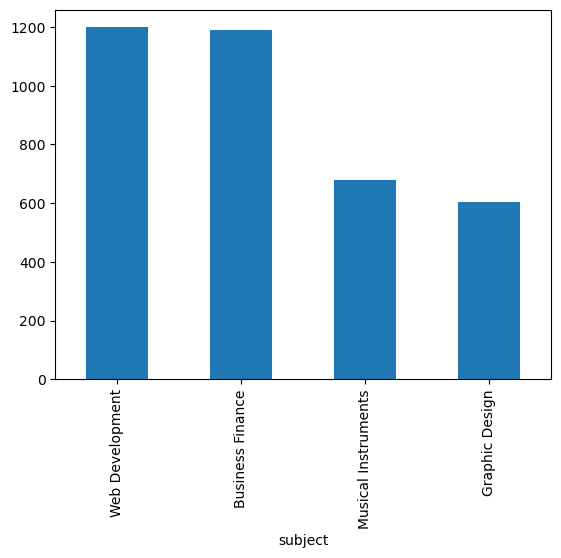

In [56]:
df['subject'].value_counts().plot(kind='bar')

## B bivariate : subject 

### how many subscribes in each subject

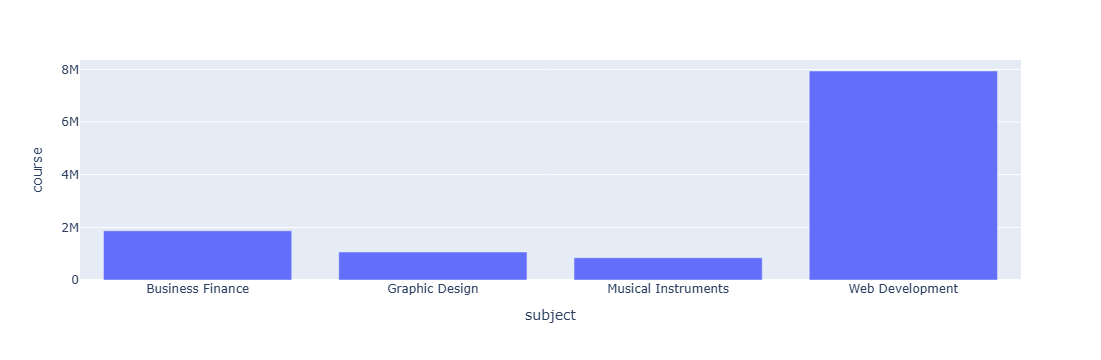

In [78]:
fig =px.bar(data_frame= df,
       x= df.groupby('subject')['num_subscribers'].sum().index,
       y=df.groupby('subject')['num_subscribers'].sum().values)
fig.update_xaxes(title='subject')
fig.update_yaxes(title='course')
fig.show()

### what is total profit made in each year

In [83]:
dict(df.groupby('subject')['profit'].sum())

{'Business Finance': 123735315,
 'Graphic Design': 76983170,
 'Musical Instruments': 53359055,
 'Web Development': 627597400}

<Axes: xlabel='subject'>

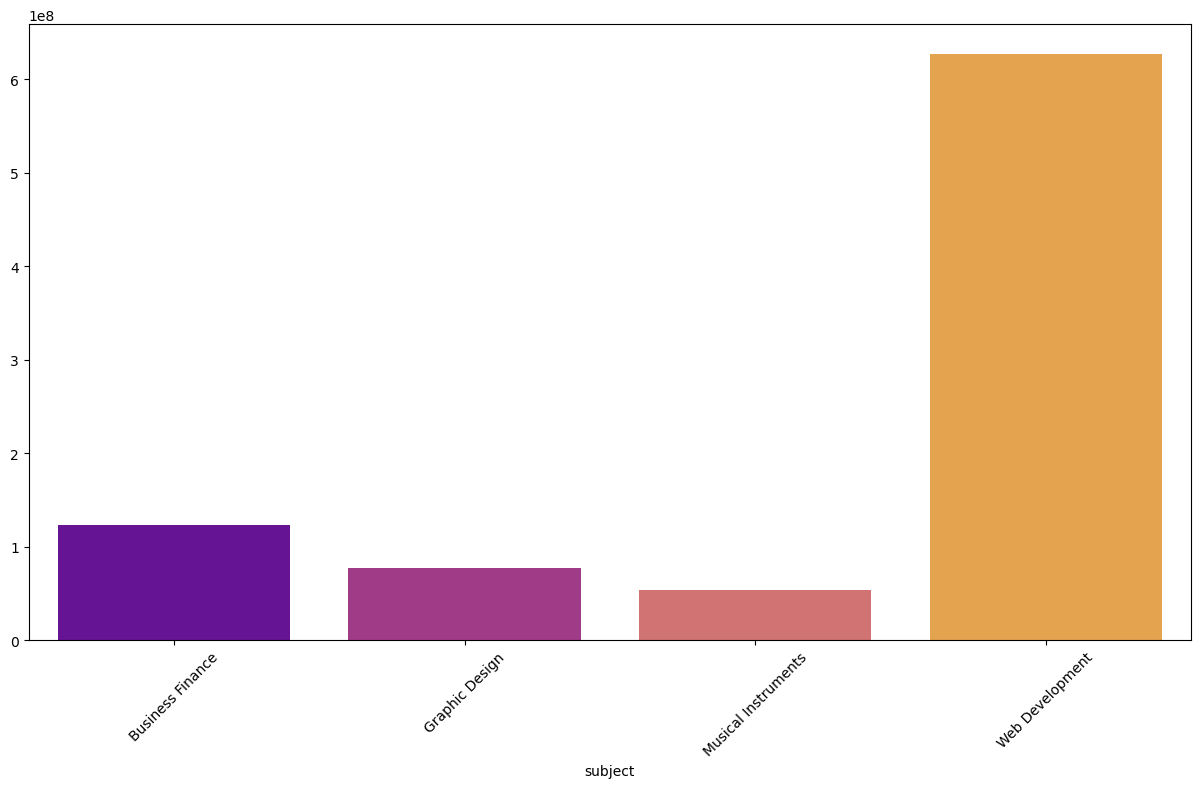

In [88]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.barplot(data =df,
            x=df.groupby('subject')['profit'].sum().index,
            y=df.groupby('subject')['profit'].sum().values,
           palette='plasma')

### in each subject, hwo many pain/inpaid in course ?

In [91]:
df.groupby('subject')['is_paid'].sum()

subject
Business Finance       1095
Graphic Design          567
Musical Instruments     634
Web Development        1066
Name: is_paid, dtype: int64

#### inpaid in each course

<Axes: xlabel='subject'>

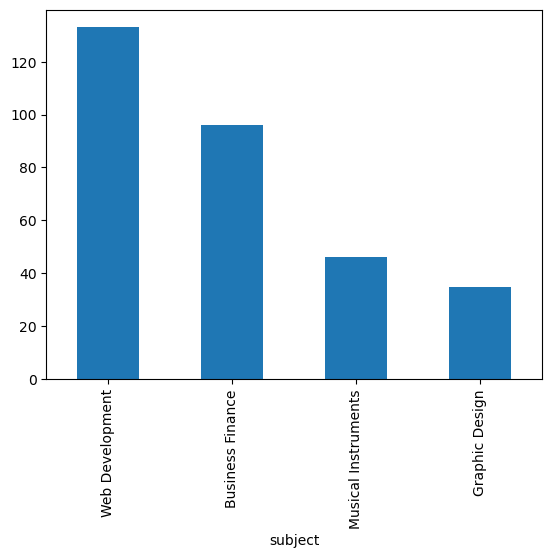

In [95]:
df[df['is_paid']==False]['subject'].value_counts().plot(kind='bar')

<Axes: xlabel='subject'>

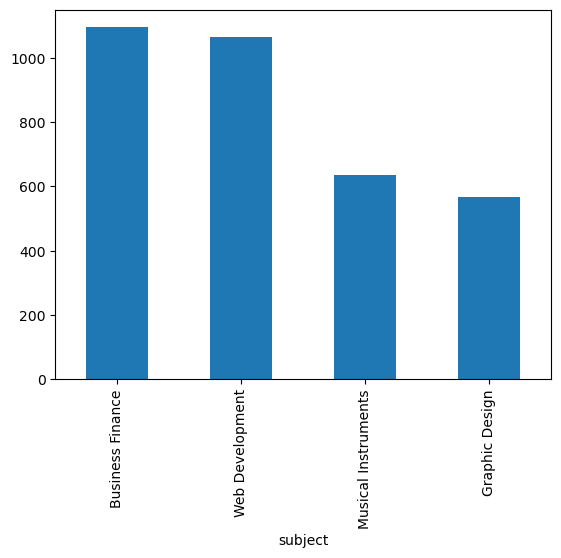

In [96]:
df[df['is_paid']==True]['subject'].value_counts().plot(kind='bar')

## C multi-variate

### Subscription Count by Subject and Payment Status

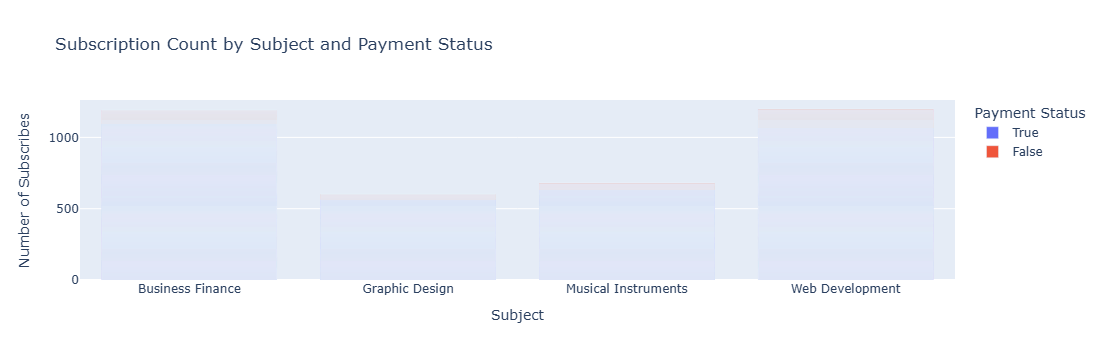

In [101]:
# Create the bar chart
fig = px.bar(
    data_frame=df,
    x='subject',                # Set x-axis directly using column name
    color='is_paid',             # Set color using the column name for clarity
    labels={
        'subject': 'Subject',    # Custom label for x-axis
        'is_paid': 'Payment Status',
        'value': 'Subscribes'    # Assuming 'subscribes' represents y-axis values
    },
    title="Subscription Count by Subject and Payment Status",  # Add a descriptive title
)

# Customize axes
fig.update_xaxes(title_text='Subject')
fig.update_yaxes(title_text='Number of Subscribes')

# Display the figure
fig.show()


### how many coure in each subject regaring price

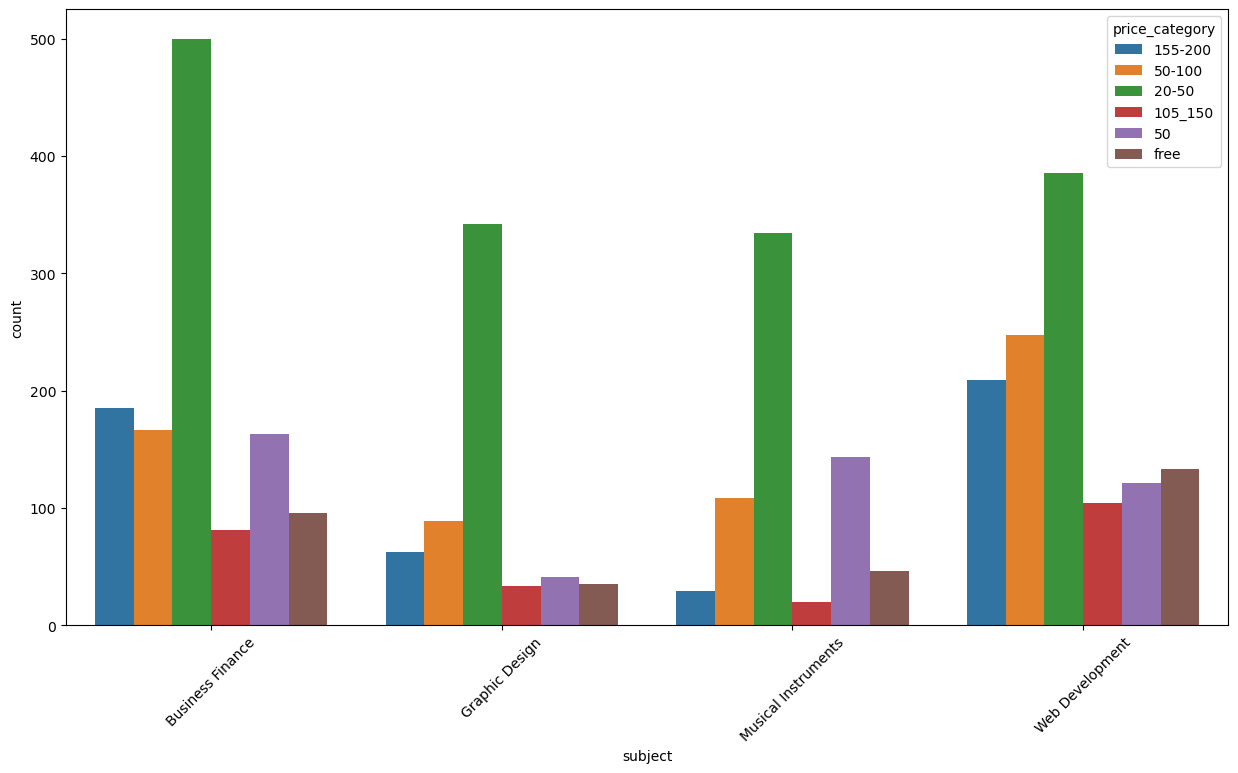

In [110]:

df['price_category'] = df['price_category'].astype(str)

# Set figure size and rotate x-axis labels
plt.figure(figsize=(15, 8))
plt.xticks(rotation=45)

# Create countplot with hue as price_category
sns.countplot(data=df, x='subject', hue='price_category')

# Display the plot
plt.show()

### how many coure in each subject regaring duration

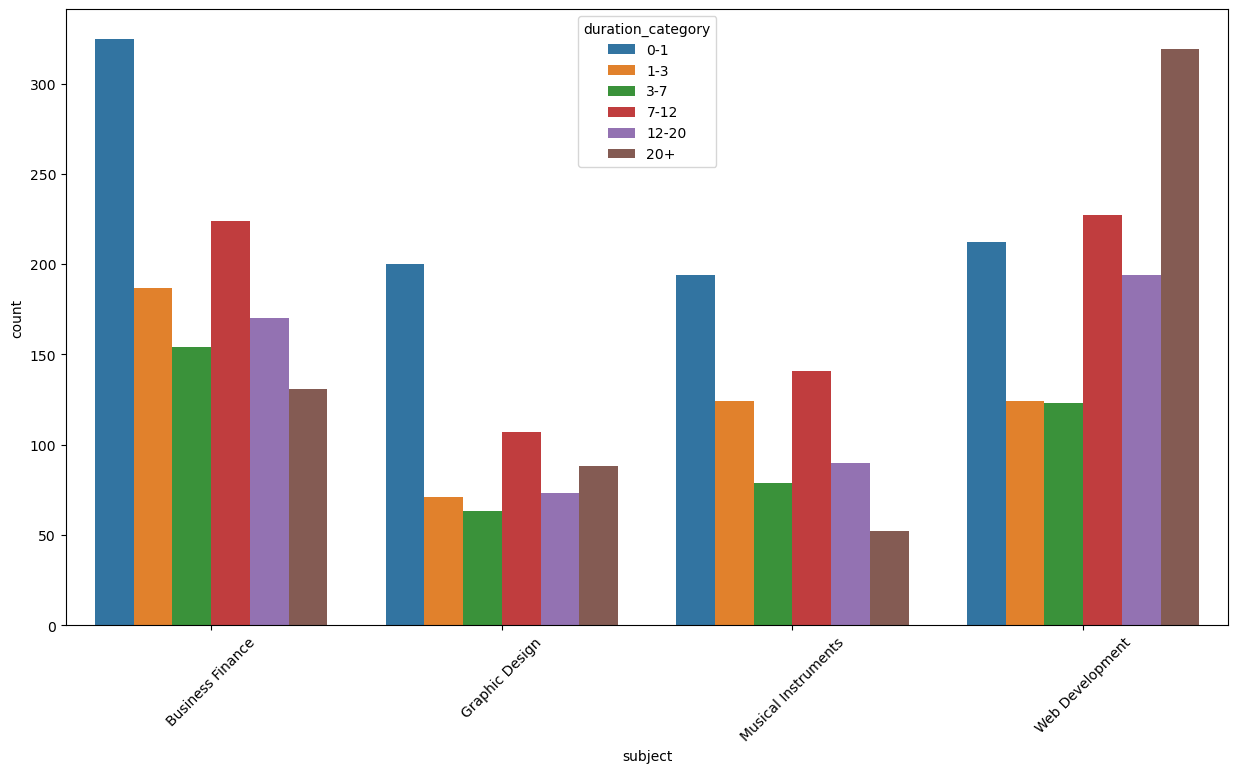

In [111]:
# Set figure size and rotate x-axis labels
plt.figure(figsize=(15, 8))
plt.xticks(rotation=45)

# Create countplot with hue as price_category
sns.countplot(data=df, x='subject', hue='duration_category')

# Display the plot
plt.show()

###  what is total profit made by each subject ,regarding price?

<Axes: xlabel='subject', ylabel='profit'>

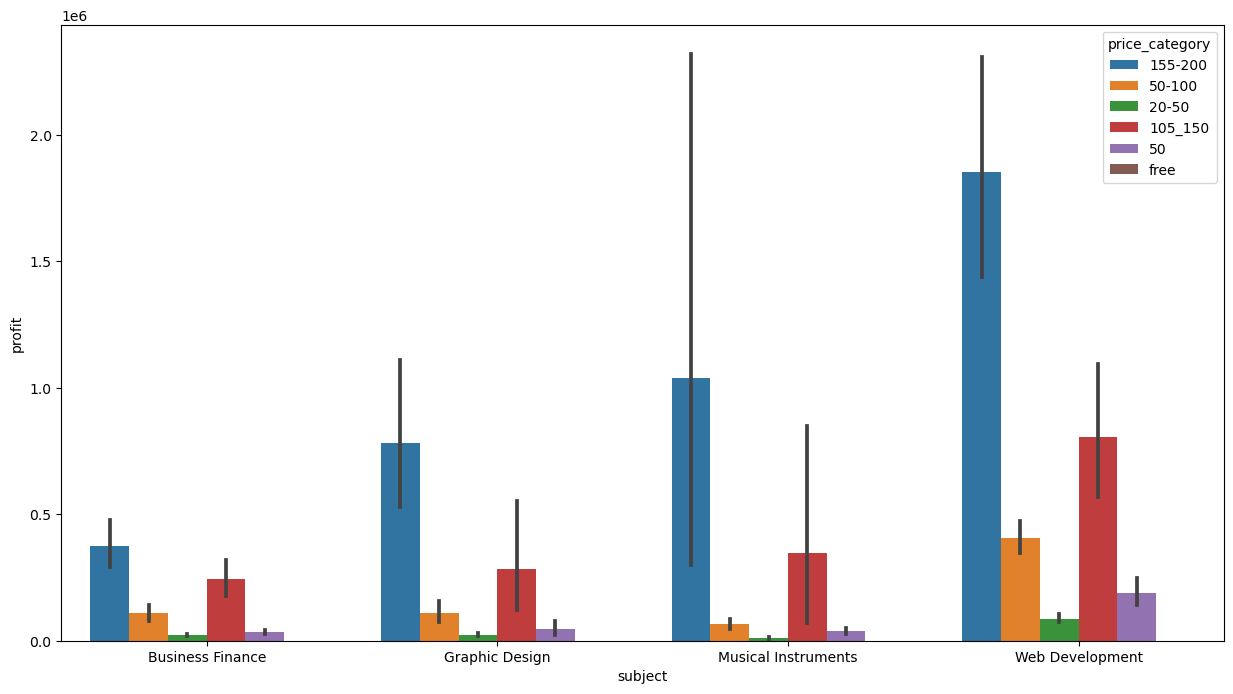

In [114]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='subject' , y='profit', hue='price_category')

### How does profit differ across various subjects and duration categories?

<Axes: xlabel='subject', ylabel='profit'>

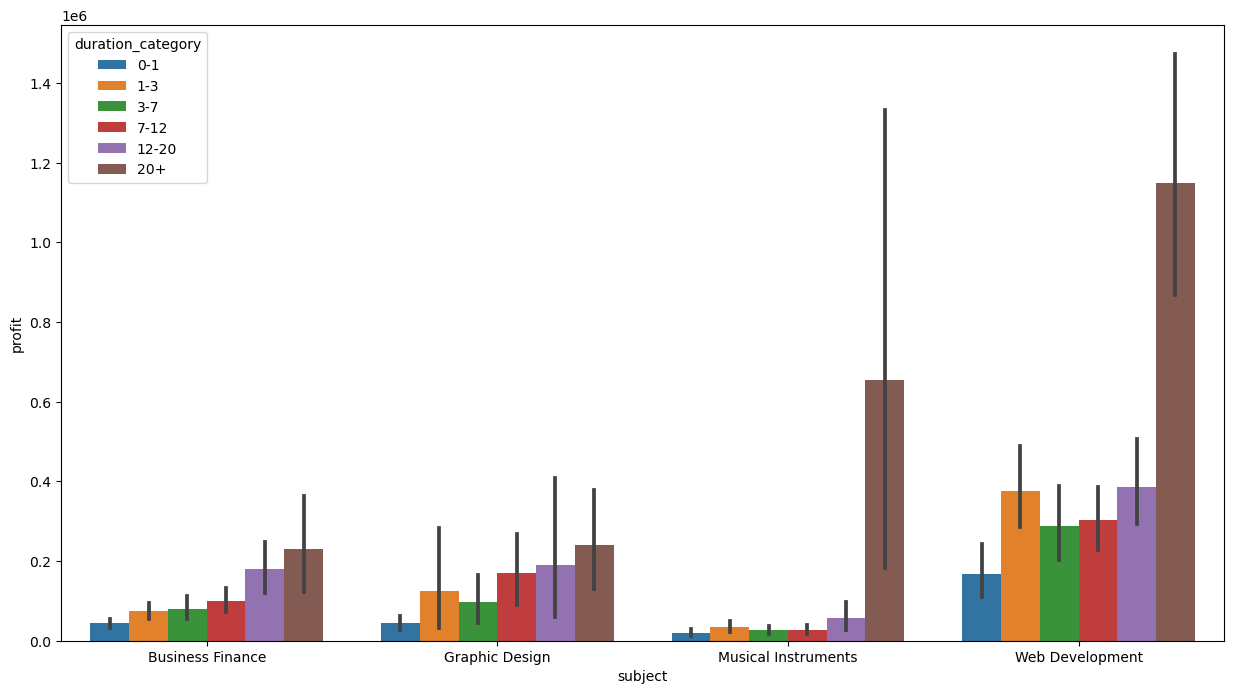

In [115]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='subject' , y='profit', hue='duration_category')

### How do the number of subscribers vary across different subjects and price categories?

<Axes: xlabel='subject', ylabel='num_subscribers'>

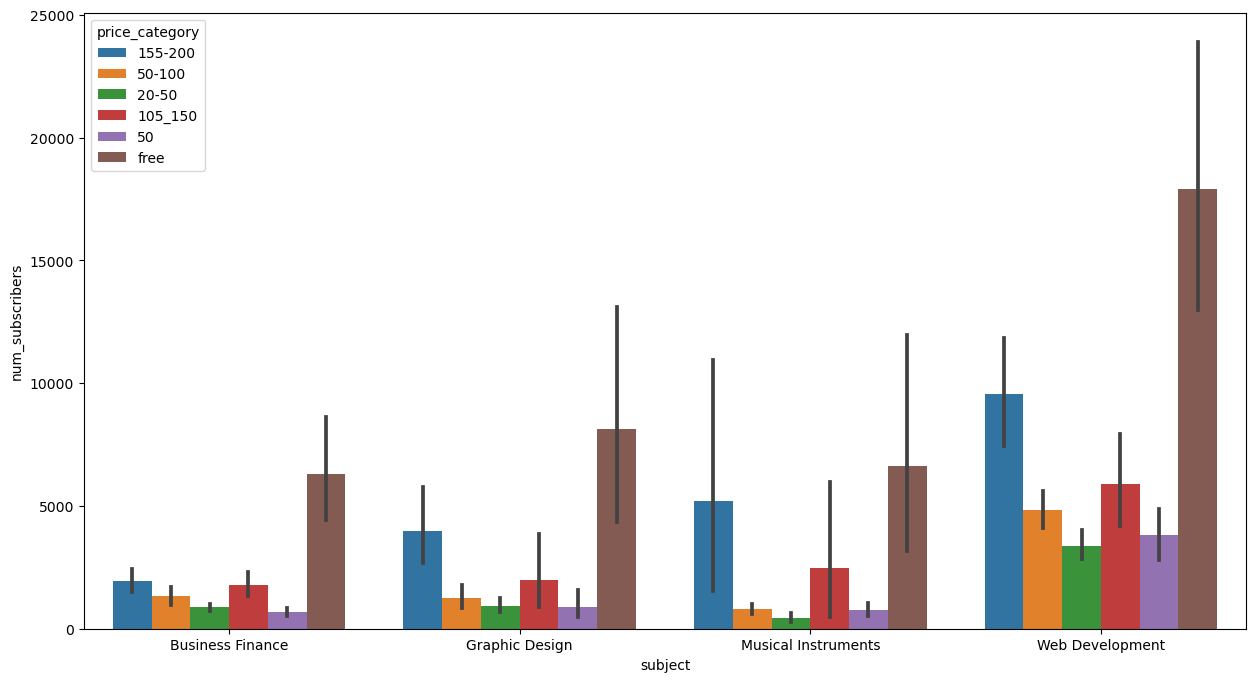

In [116]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='subject' , y='num_subscribers', hue='price_category')

### How does the number of subscribers vary across different subjects based on their corresponding levels?

<Axes: xlabel='subject', ylabel='num_subscribers'>

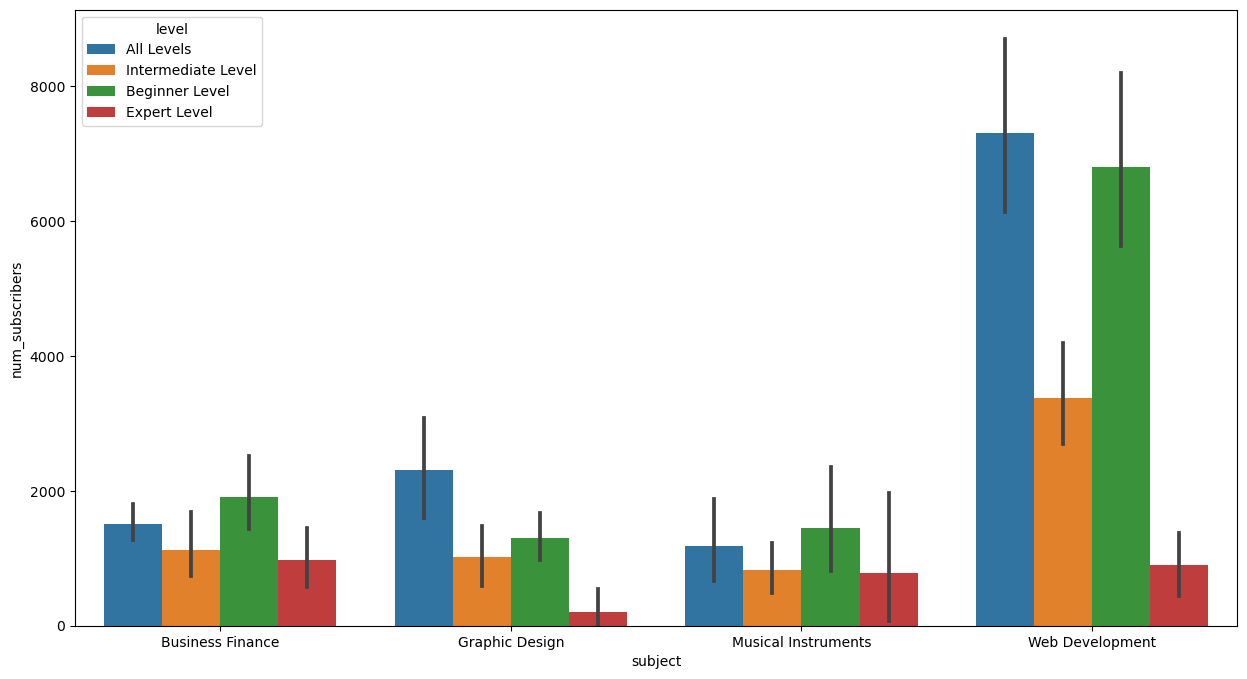

In [119]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='subject' , y='num_subscribers', hue='level')

### How has the number of subscribers changed across different subjects over the years?

<Axes: xlabel='subject', ylabel='num_subscribers'>

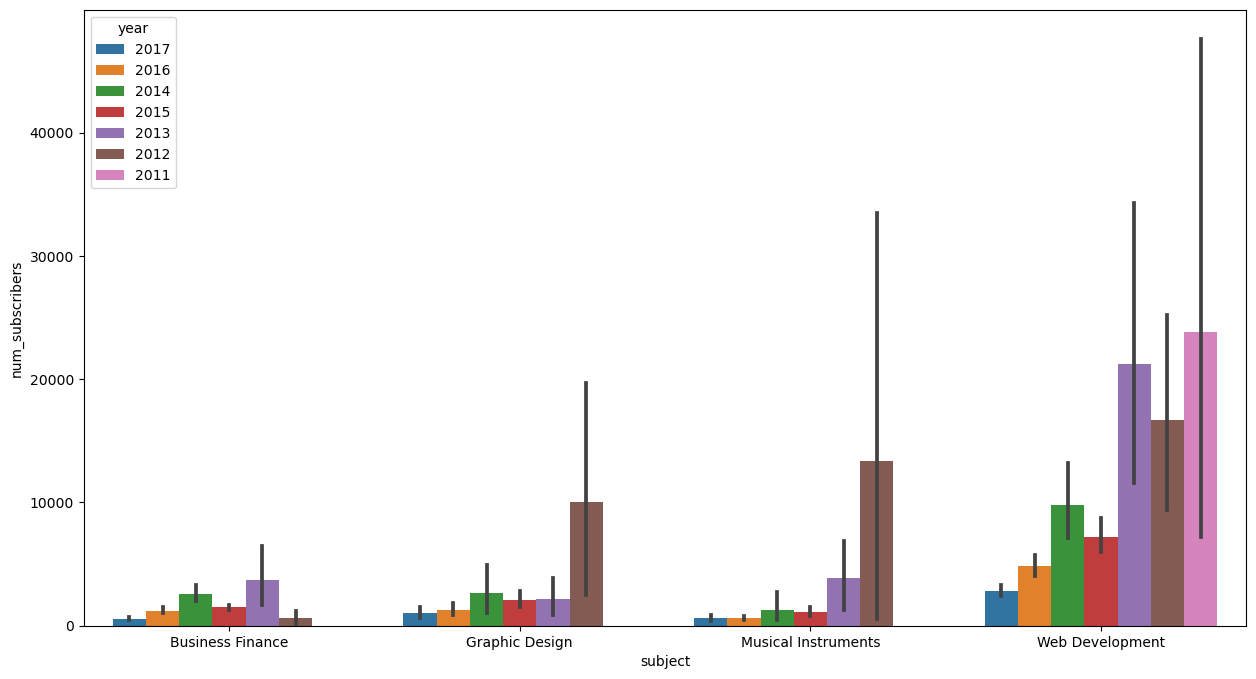

In [120]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='subject' , y='num_subscribers', hue='year')
df['year'] = df['year'].astype(str)


## In conclusion, this project provides a comprehensive view of the Udemy course landscape, offering insights that can inform potential course creators and educators on market demands and effective strategies for course design and marketing. The findings emphasize the importance of catering to diverse learner needs while maintaining high-quality content to foster engagement and success.